In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px


In [2]:
df = pd.read_csv('../../Combine_Data/men/sr_encoded.csv')


In [3]:
df.duplicated().sum()


0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         495 non-null    int64  
 1   D            495 non-null    float64
 2   E            495 non-null    float64
 3   ND           495 non-null    float64
 4   Total        495 non-null    float64
 5   year         495 non-null    float64
 6   medal        495 non-null    int64  
 7   Name         495 non-null    int64  
 8   Nation       495 non-null    int64  
 9   round_final  495 non-null    int64  
 10  round_qual   495 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 42.7 KB


In [5]:
df.describe()

,Rank,D,E,ND,Total,year,medal,Name,Nation,round_final,round_qual
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,80.995960,5.022020,7.977651,-0.061414,12.938257,2018.658586,0.016162,158.458586,41.571717,0.115152,0.830303
std,62.626164,0.851208,0.533492,0.493793,1.399910,0.599090,0.126224,93.771655,24.953933,0.319528,0.375746
min,1.000000,1.700000,4.466000,-4.300000,3.516000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,4.500000,7.766000,0.000000,12.316500,2018.000000,0.000000,77.000000,18.000000,0.000000,1.000000
50%,74.000000,5.000000,8.066000,0.000000,13.066000,2019.000000,0.000000,159.000000,41.000000,0.000000,1.000000
75%,136.000000,5.750000,8.300000,0.000000,13.816500,2019.000000,0.000000,236.000000,66.000000,0.000000,1.000000
max,201.000000,6.400000,9.066000,0.000000,15.366000,2020.000000,1.000000,323.000000,77.000000,1.000000,1.000000


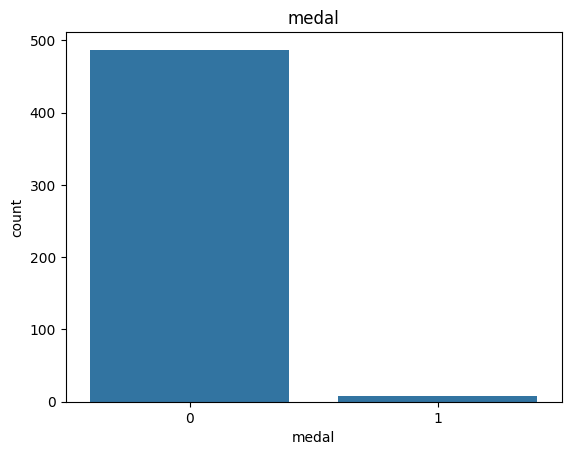

In [6]:
sns.countplot(x='medal', data=df)
plt.title('medal')
plt.show()

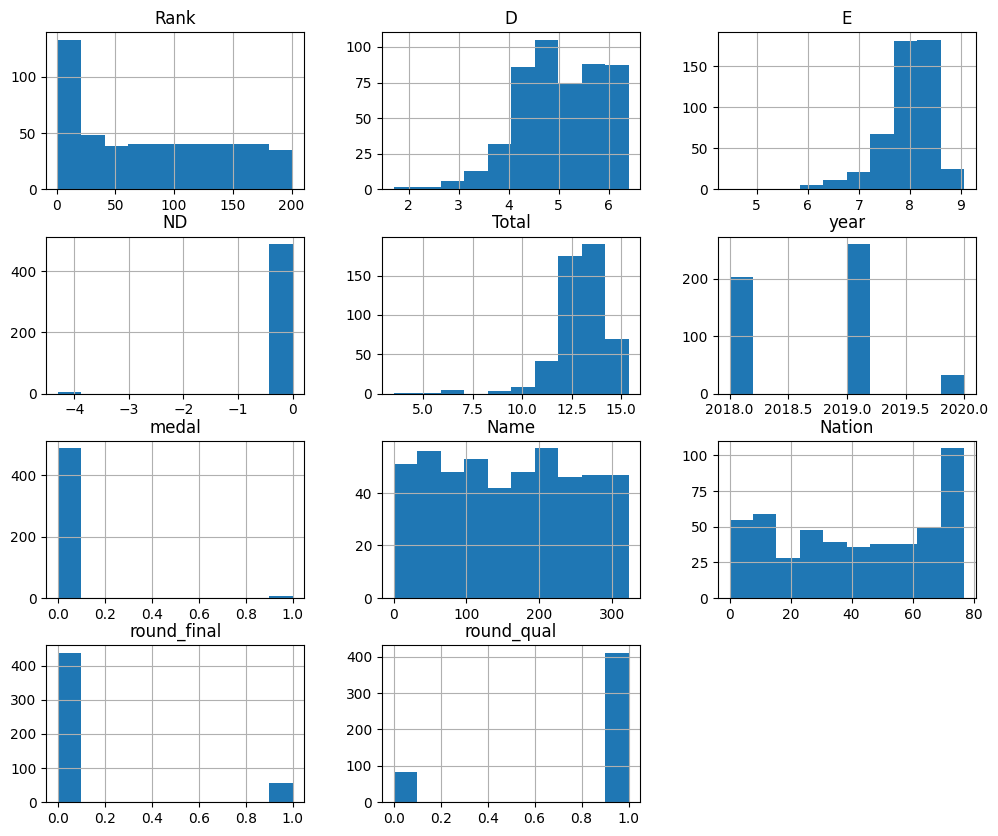

In [7]:
df.hist(figsize=(12, 10))
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

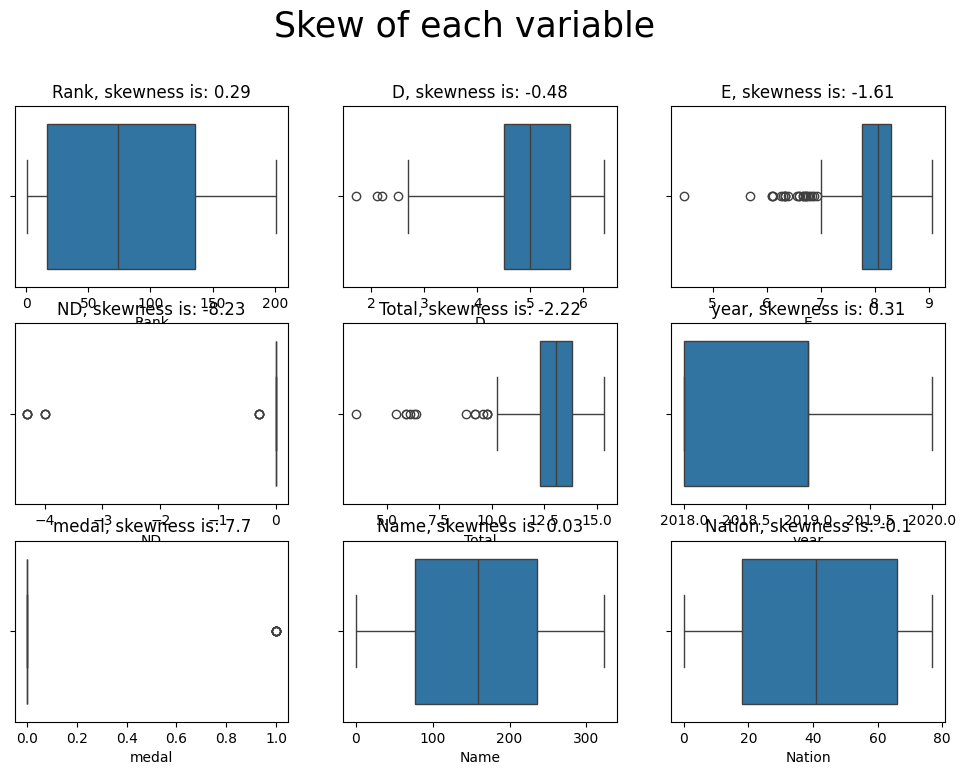

In [8]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(12,8))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis=0, skipna=True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Skew of each variable')
plt.tight_layout()
plt.show()


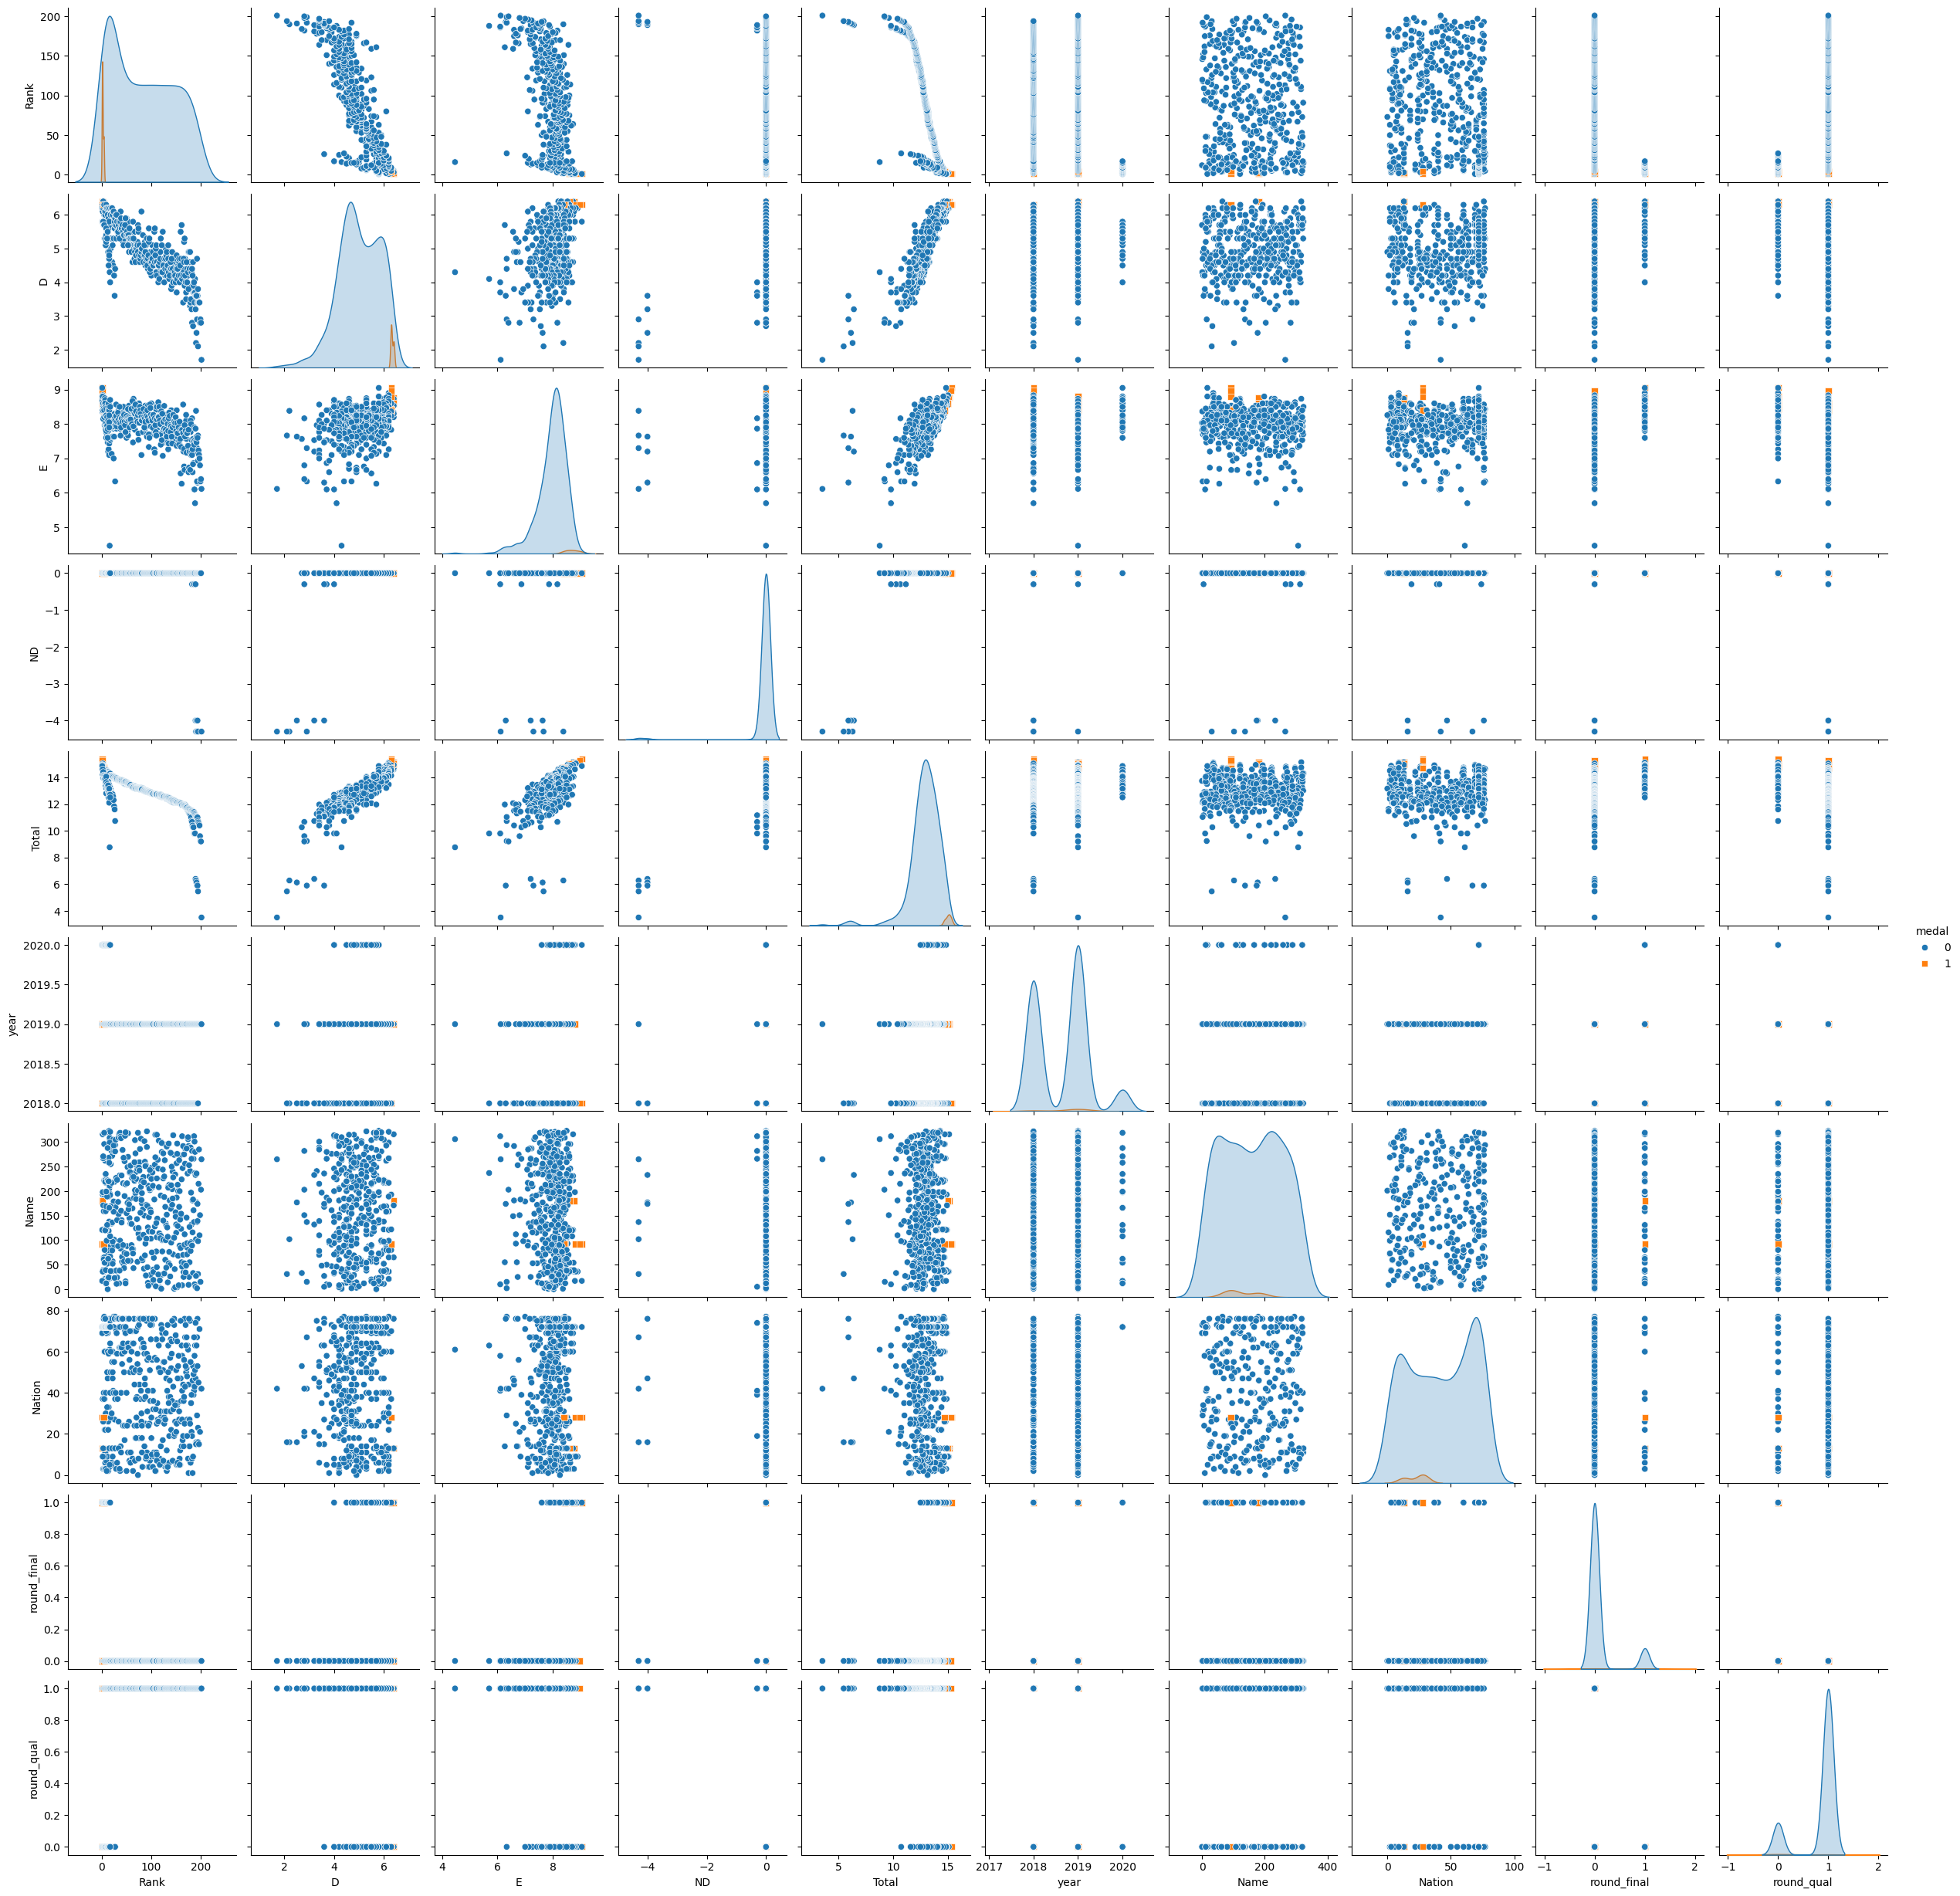

In [9]:
sns.pairplot(df, hue='medal', diag_kind='kde', markers=["o", "s"])
plt.show()

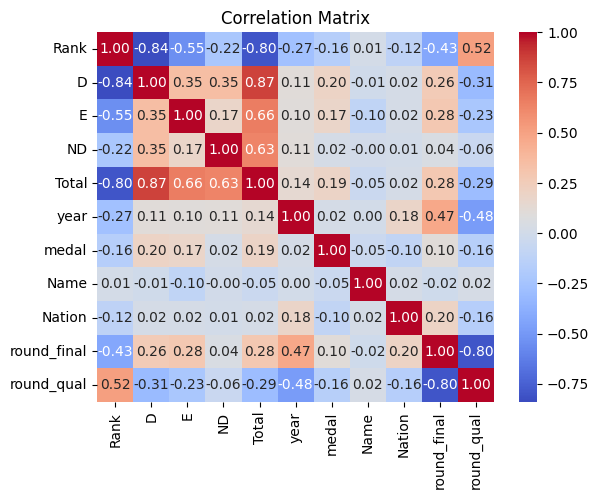

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

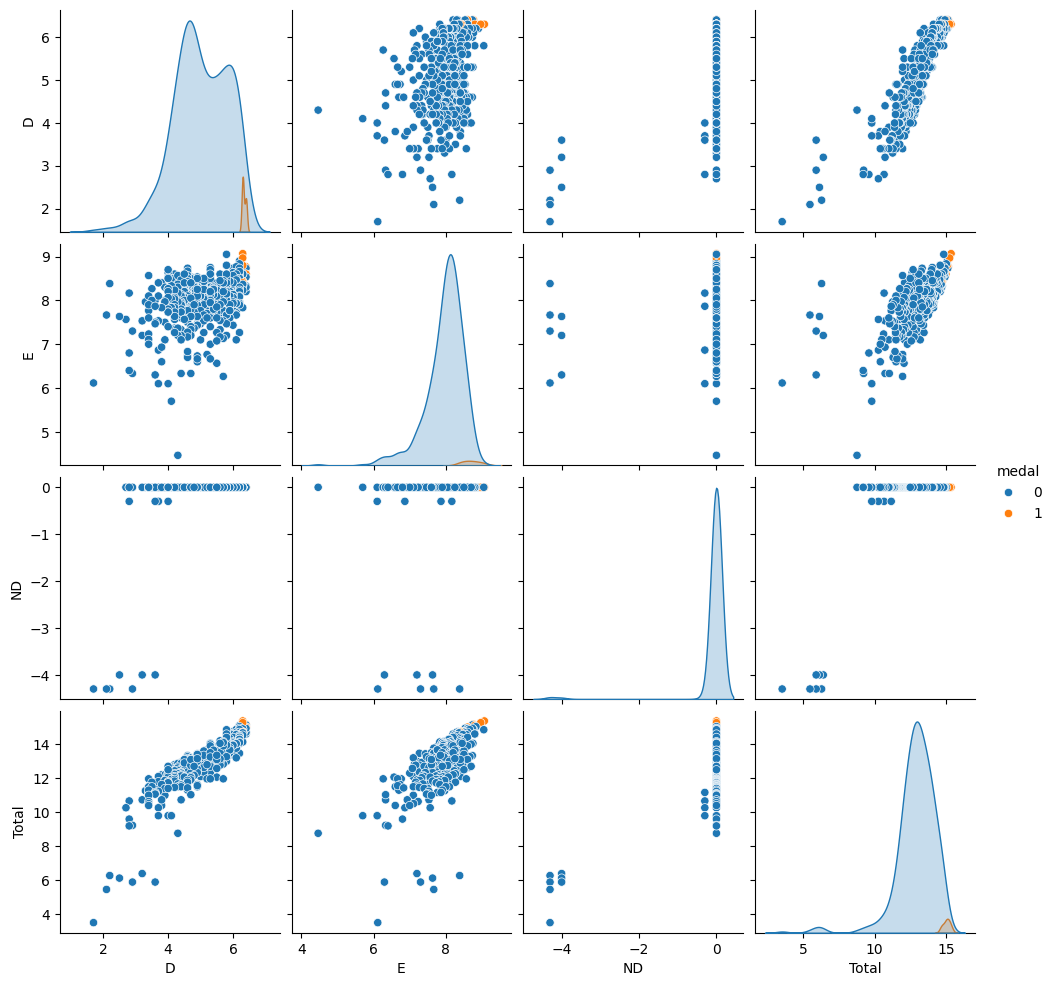

In [11]:
selected_features = ['D', 'E', 'ND', 'Total', 'medal']
sns.pairplot(df[selected_features], hue='medal')
plt.show()